# Understanding the trend of malaria and TB cases in East, West, central Africa and South Africa

### Objectives
1. Analyse the trend of malaria cases, TB mortality, sucess rate and detection rates since 2009
2. Perform data cleaning and EDA  

In [1]:
#Changing the directory to point it to location of the dataset
import os
os.chdir("E:\Dropbox\Programming_Workbooks\Analytics_Curve\WorldDataBank\MalariaTB")

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for statistical visualization
%matplotlib inline 

## Reading the data

In [3]:
#Data
malaria_TB=pd.read_excel("Data_Extract_From_Health_Nutrition_and_Population_Statistics.xlsx", sheetname="Data")


#Description file
malaria_TB_desc=pd.read_excel("Data_Extract_From_Health_Nutrition_and_Population_Statistics.xlsx", sheetname="Definition")


Creating a copy of the data. It is safe to do this as we shall transform the data and  keeping a copy of the original is useful as we can still have access to original data whenever


In [4]:
#creating a copy of the data
malaria_TB_Data = malaria_TB

In [51]:
#The data contains a description of the data fields
malaria_TB_desc

,Code,Indicator Name,Long definition,Source
0,SH.STA.MALR,Malaria cases reported,Reported cases of malaria are the number of co...,"World Health Organization, Global Health Obser..."
1,SH.TBS.MORT,"Tuberculosis death rate (per 100,000 people)",Tuberculosis death rate is the estimated numbe...,"World Health Organization, Global Tuberculosis..."
2,SH.TBS.DTEC.ZS,"Tuberculosis case detection rate (%, all forms)",Tuberculosis case detection rate (all forms) i...,"World Health Organization, Global Tuberculosis..."
3,SH.TBS.CURE.ZS,Tuberculosis treatment success rate (% of new ...,Tuberculosis treatment success rate is the per...,"World Health Organization, Global Tuberculosis..."


In [6]:
#Checking the column names of the data
malaria_TB_Data.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]',
       '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
       '2017 [YR2017]', '2018 [YR2018]'],
      dtype='object')

In [7]:
#Having a glimpse of the first three rows of the data
malaria_TB_Data.head(3)

,Country Name,Country Code,Series Name,Series Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,Angola,AGO,Malaria cases reported,SH.STA.MALR,..,1682870,1632282,1496834,1999868,2298979,2769305,3794253,3874892,..
1,Angola,AGO,"Tuberculosis death rate (per 100,000 people)",SH.TBS.MORT,77,74,72,67,59,65,59,60,67,..
2,Angola,AGO,Tuberculosis case detection rate (all forms),SH.TBS.DTEC.ZS,48,50,51,54,60,54,58,57,51,..


In [8]:
#checking type of the data points

malaria_TB_Data.dtypes.value_counts()

object    14
dtype: int64

We have entries of numerid data which have been read as object type. We shall convert them to integers/float type shortly

In [10]:
#Checking if null entries exist in the data points 
malaria_TB_Data.isnull().sum(axis=0) #across the columns
#malaria_TB_Data.isnull().sum(axis=1) #across the rows

Country Name     3
Country Code     5
Series Name      5
Series Code      5
2009 [YR2009]    5
2010 [YR2010]    5
2011 [YR2011]    5
2012 [YR2012]    5
2013 [YR2013]    5
2014 [YR2014]    5
2015 [YR2015]    5
2016 [YR2016]    5
2017 [YR2017]    5
2018 [YR2018]    5
dtype: int64

###  Observations

1. Column names has spaces. Python does not work really well with such column names thus, we shall rename them
2. Numeric data contained in column name 2009  2018 are seen as object types. We shall convert them to int type
3. The data has some null entries. Which we shall check and either perform data mutation or leave as it is.

## Data cleaning

Since python does not work well with spaces we shall rename the column names

In [11]:
malaria_TB_Data.columns=['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

Converting the data type of numeric data from object to int/float

In [12]:
malaria_TB_Data['2009'] = pd.to_numeric(malaria_TB_Data['2009'], errors='coerce')
malaria_TB_Data['2010'] = pd.to_numeric(malaria_TB_Data['2010'], errors='coerce')
malaria_TB_Data['2011'] = pd.to_numeric(malaria_TB_Data['2011'], errors='coerce')
malaria_TB_Data['2012'] = pd.to_numeric(malaria_TB_Data['2012'], errors='coerce')
malaria_TB_Data['2013'] = pd.to_numeric(malaria_TB_Data['2013'], errors='coerce')
malaria_TB_Data['2014'] = pd.to_numeric(malaria_TB_Data['2014'], errors='coerce')
malaria_TB_Data['2015'] = pd.to_numeric(malaria_TB_Data['2015'], errors='coerce')
malaria_TB_Data['2016'] = pd.to_numeric(malaria_TB_Data['2016'], errors='coerce')
malaria_TB_Data['2017'] = pd.to_numeric(malaria_TB_Data['2017'], errors='coerce')

In [13]:
malaria_TB_Data.dtypes.value_counts()
#checking data types of the dat

float64    9
object     5
dtype: int64

Selecting rows with null values


In [15]:

malaria_TB_Data[pd.isnull(malaria_TB_Data).any(axis=1)]



,Country_Name,Country_Code,Series_Name,Series_Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,AGO,Malaria cases reported,SH.STA.MALR,NaN,1682870.0,1632282.0,1496834.0,1999868.0,2298979.0,2769305.0,3794253.0,3874892.0,..
3,Angola,AGO,Tuberculosis treatment success rate (% of new ...,SH.TBS.CURE.ZS,41.0,48.0,27.0,45.0,23.0,34.0,NaN,27.0,NaN,..
4,Benin,BEN,Malaria cases reported,SH.STA.MALR,NaN,NaN,422968.0,705839.0,1078834.0,1044235.0,1268347.0,1324576.0,1696777.0,..
7,Benin,BEN,Tuberculosis treatment success rate (% of new ...,SH.TBS.CURE.ZS,88.0,90.0,89.0,90.0,89.0,89.0,88.0,88.0,NaN,..
8,Burkina Faso,BFA,Malaria cases reported,SH.STA.MALR,NaN,804539.0,428113.0,3858046.0,3769051.0,5428655.0,7015446.0,9779154.0,10225459.0,..
11,Burkina Faso,BFA,Tuberculosis treatment success rate (% of new ...,SH.TBS.CURE.ZS,77.0,78.0,77.0,80.0,80.0,81.0,78.0,80.0,NaN,..
12,Cameroon,CMR,Malaria cases reported,SH.STA.MALR,NaN,NaN,15212.0,NaN,26651.0,NaN,1162784.0,1675264.0,1191257.0,..
15,Cameroon,CMR,Tuberculosis treatment success rate (% of new ...,SH.TBS.CURE.ZS,77.0,78.0,79.0,79.0,82.0,84.0,84.0,84.0,NaN,..
16,Central African Republic,CAF,Malaria cases reported,SH.STA.MALR,NaN,NaN,NaN,46759.0,116300.0,295088.0,598833.0,1032764.0,383309.0,..
19,Central African Republic,CAF,Tuberculosis treatment success rate (% of new ...,SH.TBS.CURE.ZS,47.0,59.0,59.0,68.0,70.0,70.0,78.0,78.0,NaN,..


Looks like when reading the excel file, the last entries had extra information that was not supposed to be included

We exclude these entries 

In [16]:
#to check the last 5 entries from the data

malaria_TB_Data.iloc[-5:]


,Country_Name,Country_Code,Series_Name,Series_Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Data from database: Health Nutrition and Popul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Last Updated: 01/25/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#to exclude the last 5 entries from the data

malaria_TB_Data = malaria_TB_Data[0:44]

#or you can use drop and specify axis = 0
#malaria_TB_Data.drop([45:49], axis=0)

In [18]:
#2018 data is empty. We shall work with 2009-2017
malaria_TB_Data = malaria_TB_Data.drop('2018', axis=1)

## Exploratory Data Analysis

In [19]:
#shape of the data

malaria_TB_Data.shape

#The data contains 44 rows

(44, 13)

Our data contains 13 columns and 44 data points/rows

Checking the number of countries and countries represented


In [22]:
malaria_TB_Data["Country_Name"].unique()


array(['Angola', 'Benin', 'Burkina Faso', 'Cameroon',
       'Central African Republic', 'Gambia, The', 'Kenya', 'Rwanda',
       'South Africa', 'Uganda', 'Tanzania'], dtype=object)

In [24]:
malaria_TB_Data.Country_Name.describe()

count         44
unique        11
top       Angola
freq           4
Name: Country_Name, dtype: object

The data is from 11 countries representing East, West and Southern Africa

The data contains information about TB and malaria. We shall seprate them to ensure easy analysis

In [27]:
malaria_TB_Data.Series_Code.unique()

array(['SH.STA.MALR', 'SH.TBS.MORT', 'SH.TBS.DTEC.ZS', 'SH.TBS.CURE.ZS'], dtype=object)

In [28]:
malaria_TB_Data.Series_Code.describe()

count              44
unique              4
top       SH.STA.MALR
freq               11
Name: Series_Code, dtype: object

1. SH.STA.MALR - Malaria cases reported
2. SH.TBS.MORT - Tuberculosis death rate (per 100,000 people)
3. SH.TBS.DTEC.ZS - Tuberculosis case detection rate (all forms)
4. SH.TBS.CURE.ZS - Tuberculosis treatment success rate (% of new cases)

In [29]:
#Malaria cases reported
malaria_Case=malaria_TB_Data[malaria_TB_Data.Series_Code == 'SH.STA.MALR']

In [30]:
#Contains all the TB data - mortality rate, cases detected and cured(tratment success rate)
TB_Data=malaria_TB_Data[~(malaria_TB_Data.Series_Code == 'SH.STA.MALR')]


In [31]:
#Tuberculosis death rate (per 100,000 people)
TB_Mort = malaria_TB_Data[malaria_TB_Data.Series_Code == 'SH.TBS.MORT']

In [32]:
#Tuberculosis case detection rate (all forms)
TB_Dtec = malaria_TB_Data[malaria_TB_Data.Series_Code == 'SH.TBS.DTEC.ZS']

In [33]:
#Tuberculosis treatment success rate (% of new cases)
TB_Cure = malaria_TB_Data[malaria_TB_Data.Series_Code == 'SH.TBS.CURE.ZS']

Below is a summary of the TB an malaria case

In [34]:
malaria_Case[[ '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017']].describe()

C:\Users\Innocenter\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,2010,2011,2012,2013,2014,2015,2016,2017
count,7.000000e+00,9.000000e+00,9.000000e+00,1.000000e+01,9.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01
mean,8.185974e+05,4.682160e+05,1.223630e+06,1.204041e+06,1.921841e+06,2.420194e+06,3.331365e+06,3.575605e+06
std,6.477587e+05,5.274291e+05,1.307392e+06,1.228438e+06,1.816432e+06,2.606864e+06,3.527011e+06,4.139685e+06
min,8.060000e+03,9.866000e+03,5.629000e+03,8.645000e+03,1.170500e+04,4.357000e+03,4.323000e+03,2.829500e+04
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.682870e+06,1.632282e+06,3.858046e+06,3.769051e+06,5.428655e+06,7.137662e+06,9.779154e+06,1.166783e+07


The mean of malaria cases reported has been increasing since 2010 and as of the year 2017 an average of 3.575605e+06 cases were reported

In [35]:
TB_Mort[[ '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017']].describe()

,2010,2011,2012,2013,2014,2015,2016,2017
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,42.100000,40.272727,37.300000,34.418182,33.818182,33.190909,33.290909,33.872727
std,30.178966,29.990602,26.121753,22.930016,23.271176,21.435599,21.278931,22.319771
min,6.100000,6.200000,5.700000,5.300000,5.200000,5.000000,5.100000,4.900000
25%,14.500000,13.250000,14.500000,15.000000,13.300000,14.600000,15.200000,16.000000
50%,40.000000,37.000000,36.000000,33.000000,30.000000,29.000000,29.000000,30.000000
75%,75.500000,74.000000,62.500000,55.000000,52.500000,53.000000,54.000000,48.500000
max,79.000000,77.000000,73.000000,70.000000,68.000000,63.000000,60.000000,68.000000



The average TB death rate (per 100,000 people) has been decreasing and this could be due to the increase of TB awarenesss prgorams

In [36]:
TB_Dtec[[ '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017']].describe()

,2010,2011,2012,2013,2014,2015,2016,2017
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,54.454545,56.727273,57.363636,58.636364,58.909091,59.090909,58.363636,57.454545
std,15.174740,17.088539,13.410986,12.043859,12.692159,12.324403,11.377809,10.501082
min,31.000000,31.000000,34.000000,38.000000,36.000000,37.000000,40.000000,44.000000
25%,45.500000,46.500000,48.500000,51.500000,53.500000,53.000000,53.000000,51.500000
50%,53.000000,58.000000,57.000000,60.000000,59.000000,59.000000,57.000000,53.000000
75%,63.000000,70.500000,65.000000,64.500000,64.500000,65.500000,64.500000,63.500000
max,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000


% of all forms of TB case detection rate has been increasing since 2010 and this could be due to the awareness programs rolled out in the countries

In [37]:
TB_Cure[[ '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017']].describe()

C:\Users\Innocenter\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,2010,2011,2012,2013,2014,2015,2016,2017
count,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,11.000000,0.0
mean,74.454545,75.272727,78.272727,76.818182,78.363636,83.000000,77.545455,NaN
std,15.141754,18.292572,12.775687,18.893481,16.007953,5.011099,17.253195,NaN
min,48.000000,27.000000,45.000000,23.000000,34.000000,75.000000,27.000000,NaN
25%,63.500000,75.000000,77.000000,76.500000,76.500000,NaN,79.000000,NaN
50%,78.000000,79.000000,80.000000,82.000000,84.000000,NaN,81.000000,NaN
75%,87.000000,87.500000,85.500000,86.000000,87.500000,NaN,85.000000,NaN
max,90.000000,89.000000,90.000000,91.000000,90.000000,90.000000,90.000000,NaN


% of new cases of TB treatment success rate has been fluctuating over the years 

## Visualizations

Here we shall visualize the TB and malaria data to understand more about the trends. We shall show how to visualize data using bar charts, line graphs, boxplots

### Bar chart using selected years

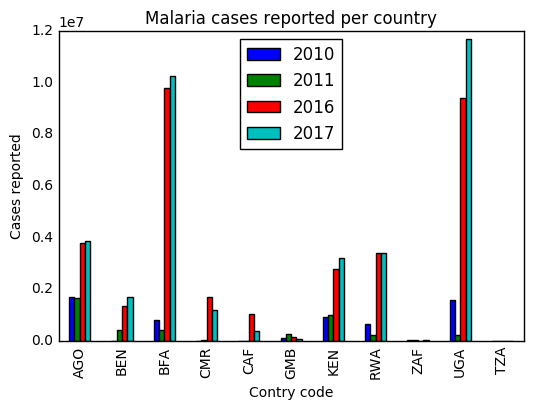

In [46]:
malaria_Case.plot.bar(x='Country_Code', y = ['2010','2011','2016' ,'2017'])
plt.title("Malaria cases reported per country")
plt.xlabel("Contry code")
plt.ylabel('Cases reported')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom=True, right='off', left='off', labelleft=True)


1. A column bar chart presents data visually in bars and 
2. Bar charts shows comparisons between categories of data points

It is a great way to see the difference of categories visually. In this case, Uganda has been reporting more malaria cases in 2016, 2017 compared to the other countries. It is obvious to see that malaria cases has been increasing over the years for all countries expect The Gambia - this could be because of malaria programs that supply mosquito nets or educate people or the data has not been reported effectively.

### Bar chart using mean values 

In [81]:
avg_TB_Mort=TB_Mort[[ '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017']].mean()


This presents the average TB death rate (per 100,000 people) in a dataframe

In this case, we use Seaborn a statistical visualization tool to plot

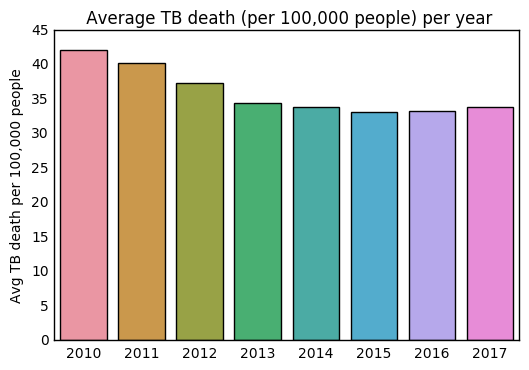

In [87]:
g=sns.barplot(x=avg_TB_Mort.index, y=avg_TB_Mort.values)
g.set_title(' Average TB death (per 100,000 people) per year')
g.set_ylabel("Avg TB death per 100,000 people")
g.set_xlabel= (" Year")
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom=True, right='off', left='off', labelleft=True)


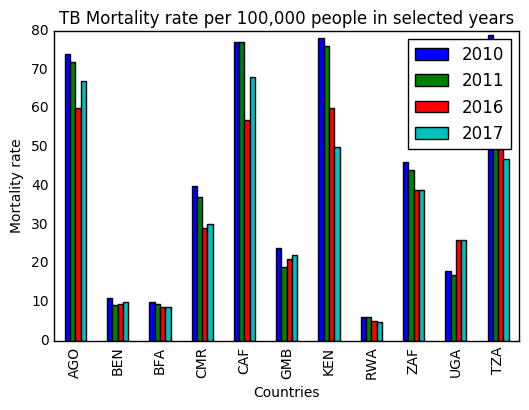

In [107]:
plt.figure(figsize=(12, 8))

fig= TB_Mort.plot.bar(x='Country_Code', y = ['2010','2011','2016' ,'2017'])
fig.set_ylabel('Mortality rate')
fig.set_xlabel('Countries')

fig.set_title('TB Mortality rate per 100,000 people in selected years')

plt.legend(loc='upper right')

plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom=True, right='off', left='off', labelleft=True)


### Box plot 

The box plot will show us an indication of 1st quantile, 2nd quantile(median), the 3rd quantile, the minimum, the maximum and the outliers(if they exist).


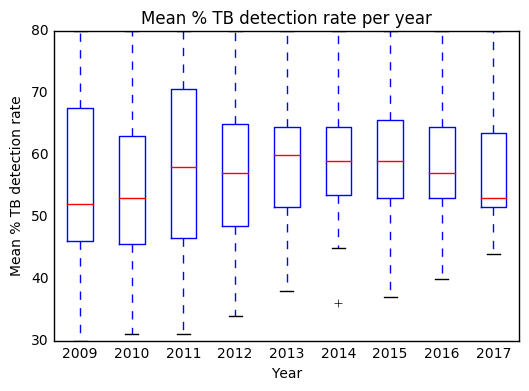

In [102]:
TBdtecfig=TB_Dtec[['2009', '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017']].plot.box()
TBdtecfig.set_title('Mean % TB detection rate per year')
TBdtecfig.set_ylabel('Mean % TB detection rate')
TBdtecfig.set_xlabel('Year')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom=True, right='off', left='off', labelleft=True)


From our plot outliers exist - the % average of detection rate has been fluctuating over the years 

### Line graphs

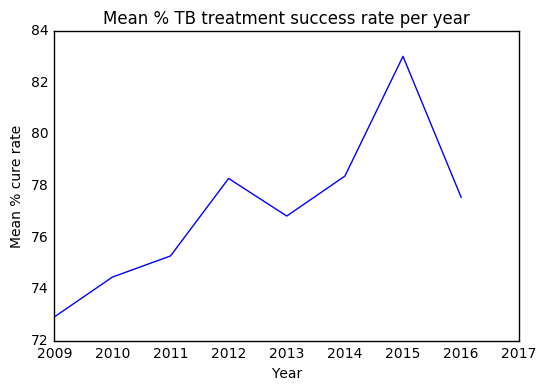

In [103]:
TBcurefig=TB_Cure[[ '2009', '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017']].mean().plot()
TBcurefig.set_title('Mean % TB treatment success rate per year')
TBcurefig.set_ylabel('Mean % cure rate')
TBcurefig.set_xlabel('Year')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom=True, right='off', left='off', labelleft=True)


1. The mean % treatment success rate was highest in 2015 and dropped in 2016 
2. The mean % treatment success rate has been increasing over the years until 2015 before the huge drop

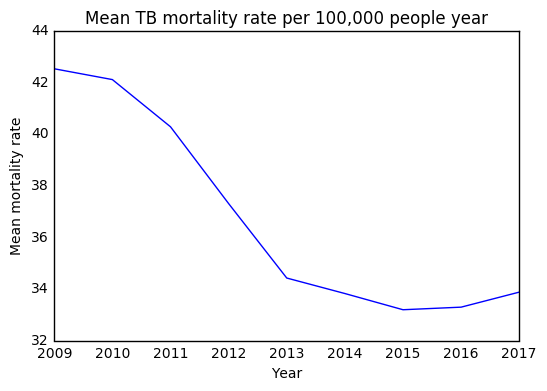

In [105]:
mortfig=TB_Mort[[ '2009', '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017']].mean().plot()
mortfig.set_title('Mean TB mortality rate per 100,000 people year')
mortfig.set_ylabel('Mean mortality rate')
mortfig.set_xlabel('Year')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom=True, right='off', left='off', labelleft=True)


C:\Users\Innocenter\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


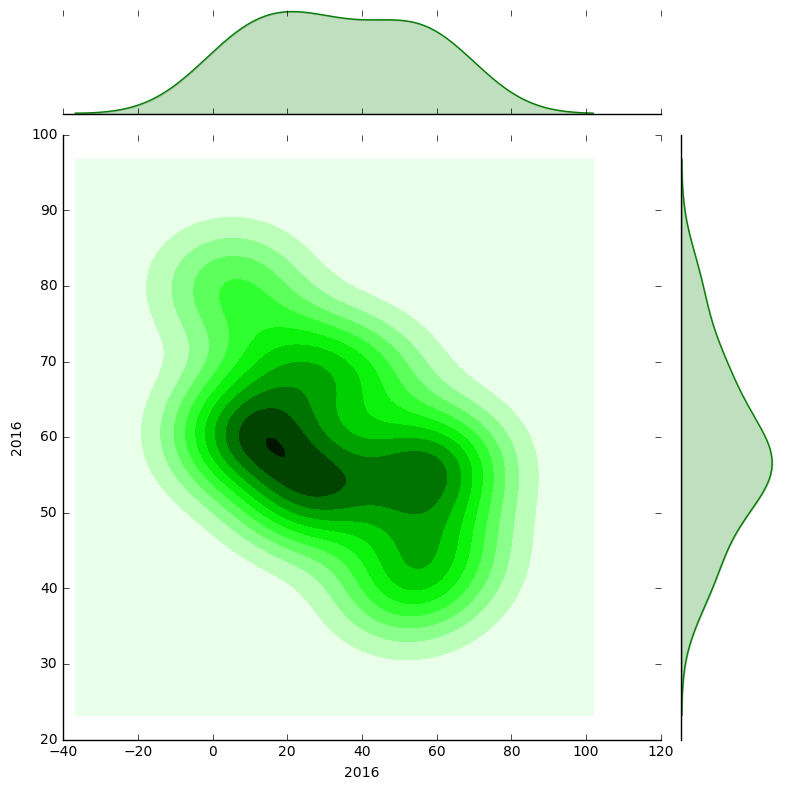

In [108]:
sns.jointplot(TB_Mort["2016"], TB_Dtec["2016"],height=8,color="g",kind="kde")
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom=True, right='off', left='off', labelleft=True)


mort is on the y axis
The majority cases detected (0-20) have the highest mortality rate

# Conclusion

1. Malaria cases reported have increased since 2010 to 2017
2. TB mortality per 100,000 people has been decreasing since 2010 to 2017
3. % TB detection rate has been fluctuating slightly over the years
4. % TB treatment success rate has been increasing up until 2016 where a drop was experienced

# References

1. Nairobi Data Science, April Newsletter (Panda tricks). You can subscribe by sending an email to sidney.ochieng@gmail.com or chrisorwa@gmail.com 
2. https://towardsdatascience.com/10-python-pandas-tricks-that-make-your-work-more-efficient-2e8e483808ba
3. https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
4. Converting types https://pbpython.com/pandas_dtypes.html
5. https://semasuka.github.io/blog/2019/03/26/introduction-to-eda.html


Next I will work on cancer data analysis